# Problem 24.2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

##### Define a random signal to be used to test filters.

In [3]:
y = np.random.uniform(low=-1., high=1., size=400)

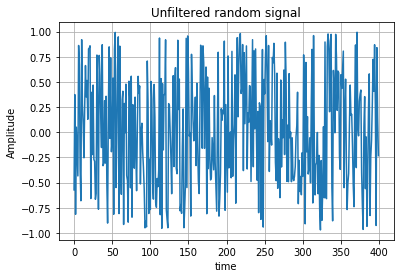

In [4]:
plt.plot(y)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.title('Unfiltered random signal')
plt.show()

##### Define the filters

In [5]:
filt1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1])